In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



# to change scientific numbers to float
np.set_printoptions(formatter={"float_kind":"{:f}".format})

sns.set(rc={"figure.figsize":(5,5)})

pd.set_option("display.max_columns", None)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
raw_data = pd.read_csv("Datasets Folder/train spaceship titanic.csv")
raw_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Checking for missing values
raw_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
raw_data[raw_data.isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# visualizing the data types

raw_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
# changing the types so we can visualize

strings = ["PassengerId","HomePlanet","CryoSleep","Cabin","Destination","Name","Transported"]
numeric = ["Age", "RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

for s in strings:
    raw_data[s] = raw_data[s].astype(str)
    
for n in numeric:
    raw_data[n] = raw_data[n].astype(float)

In [7]:
# investigating all the element within each feature

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values <10:
        print(" the number of values for feature {} : {}--{}".format(column,nr_values,unique_vals))
    else:
        print("The number of values for feature {} :{}".format(nr_values, column))

The number of values for feature 8693 :PassengerId
 the number of values for feature HomePlanet : 4--['Earth' 'Europa' 'Mars' 'nan']
 the number of values for feature CryoSleep : 3--['False' 'True' 'nan']
The number of values for feature 6561 :Cabin
 the number of values for feature Destination : 4--['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' 'nan']
The number of values for feature 81 :Age
The number of values for feature 403 :VIP
The number of values for feature 1274 :RoomService
The number of values for feature 1508 :FoodCourt
The number of values for feature 1116 :ShoppingMall
The number of values for feature 1328 :Spa
The number of values for feature 1307 :VRDeck
The number of values for feature 8474 :Name
 the number of values for feature Transported : 2--['False' 'True']


## Data Cleaning

In [8]:
# investigating Cabin
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_rows", None)

raw_data["Cabin"].unique()
#raw_data["Cabin"].value_counts()

array(['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S',
       'F/3/S', 'B/1/P', 'F/1/P', 'G/1/S', 'F/2/P', 'nan', 'F/3/P',
       'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P', 'E/0/S', 'D/0/P', 'C/2/S',
       'F/6/S', 'C/0/P', 'F/8/P', 'G/4/S', 'F/9/P', 'D/1/S', 'D/1/P',
       'F/8/S', 'F/10/S', 'G/1/P', 'G/2/P', 'B/3/P', 'G/3/P', 'F/10/P',
       'E/1/S', 'E/2/S', 'G/6/S', 'F/11/S', 'A/1/S', 'G/7/S', 'F/12/S',
       'F/13/S', 'F/14/S', 'E/3/S', 'G/6/P', 'G/10/S', 'F/15/S', 'E/4/S',
       'F/16/S', 'F/13/P', 'F/14/P', 'F/17/S', 'D/3/P', 'C/3/S', 'F/18/S',
       'F/15/P', 'C/4/S', 'G/13/S', 'F/16/P', 'G/14/S', 'C/5/S', 'F/17/P',
       'E/5/S', 'G/15/S', 'G/16/S', 'F/20/S', 'G/9/P', 'A/2/S', 'G/11/P',
       'F/19/P', 'G/12/P', 'F/23/S', 'F/24/S', 'G/18/S', 'F/21/P',
       'D/2/S', 'G/19/S', 'B/5/P', 'E/6/S', 'B/1/S', 'F/23/P', 'G/20/S',
       'F/24/P', 'D/4/P', 'A/0/P', 'F/25/P', 'G/21/S', 'F/27/P', 'F/27/S',
       'E/7/S', 'D/3/S', 'E/8/S', 'G/22/S', 'F/29/S', 'D/5/S', 'G

In [9]:
# cleaning the Cabin
raw_data_clean =raw_data.copy()

# creating a copy file
raw_data_clean[["Deck", "Num", "Side"]] = raw_data_clean["Cabin"].str.split("/", expand=True)

del raw_data_clean["Cabin"]

raw_data_clean.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


## Visualizing the Data

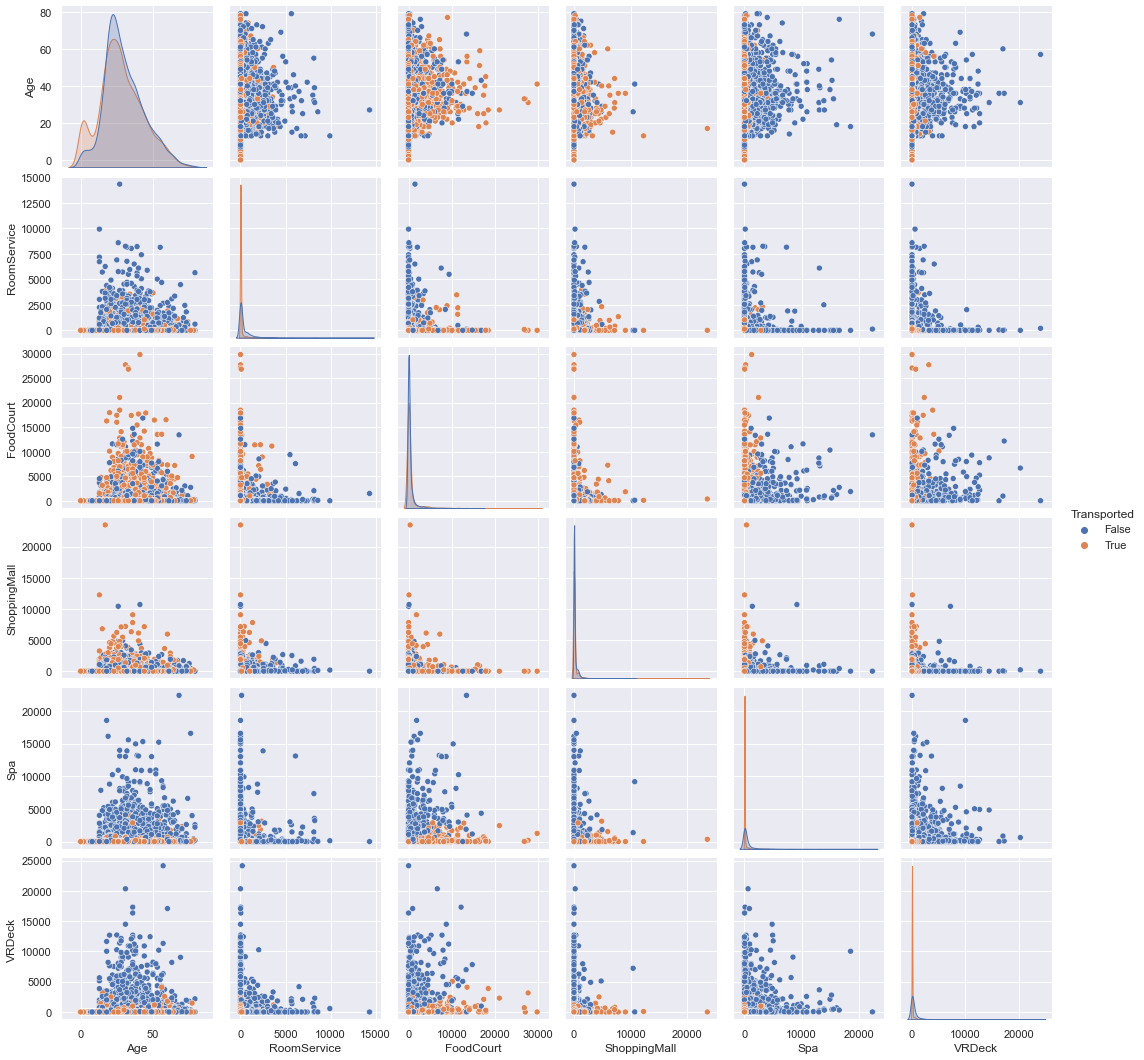

In [10]:
sns.pairplot(raw_data_clean[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]], hue="Transported")

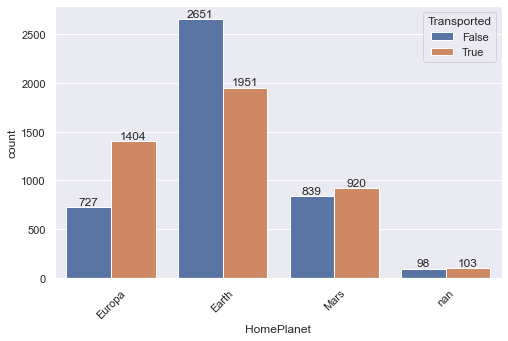

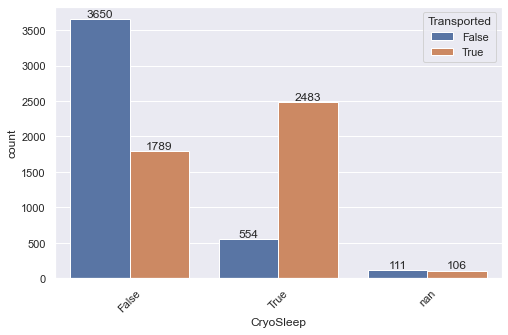

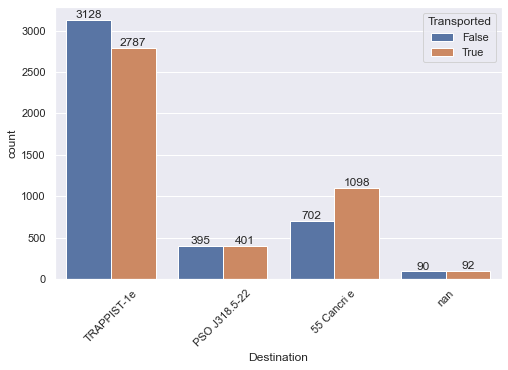

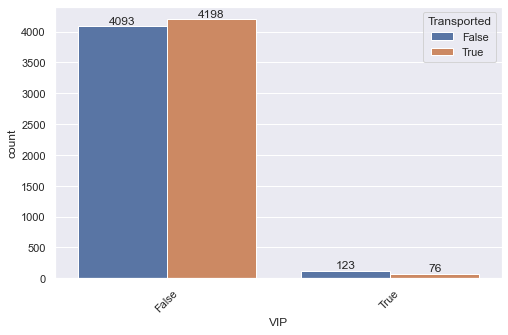

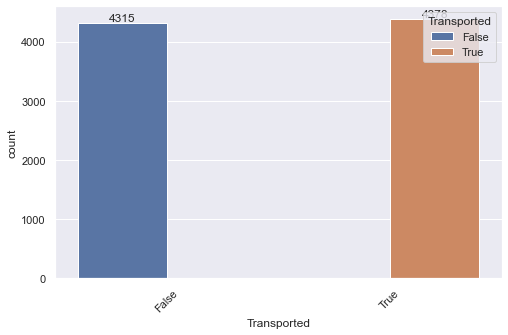

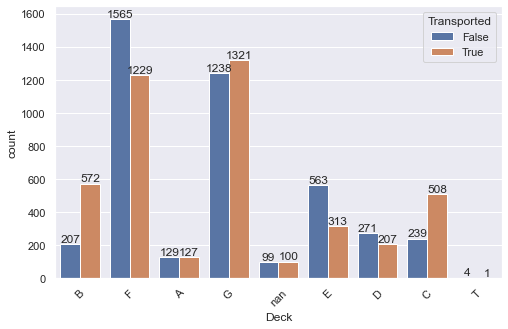

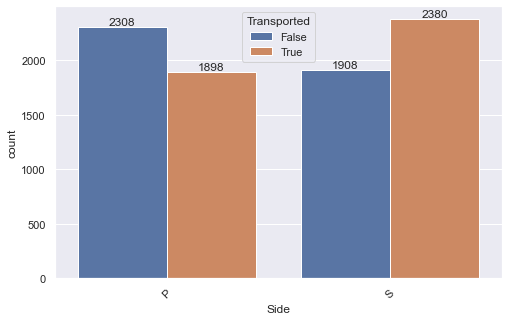

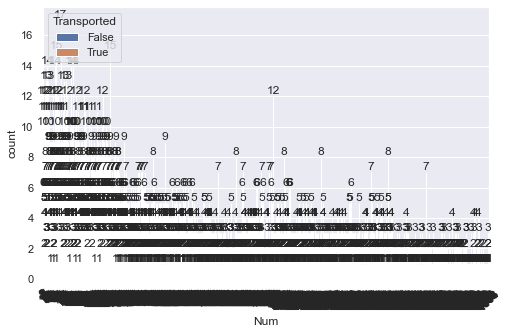

In [11]:
# total price by carbody for multile categories

categories = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported","Deck","Side","Num"]

# increase the size of sns plots
sns.set(rc={"figure.figsize":(8,5)})

for f in categories:
    ax = sns.countplot(x =f,data = raw_data_clean,hue="Transported")
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

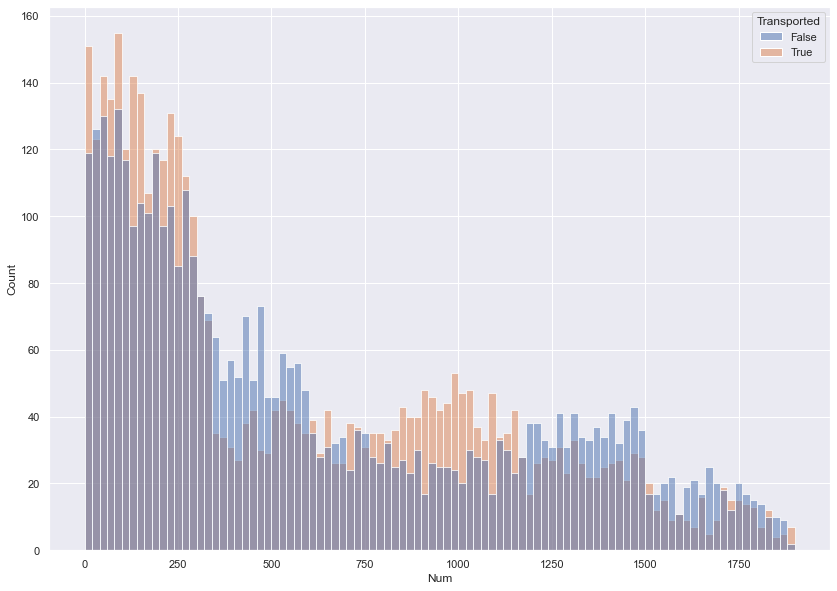

In [12]:
# increase the size of sns plots
sns.set(rc={"figure.figsize":(14,10)})

num_test_raw = raw_data_clean.copy()

num_test_raw = num_test_raw[~num_test_raw["Num"].isna()]
num_test_raw["Num"] = num_test_raw["Num"].astype(int)

ax = sns.histplot(x = "Num", data = num_test_raw, hue="Transported", binwidth =20)

In [13]:
# checking the table

num_test_raw[["Num", "Transported", "PassengerId"]].groupby(["Num","Transported"], as_index=False).agg({"PassengerId":"count"})

,Num,Transported,PassengerId
0,0,False,12
1,0,True,6
2,1,False,5
3,1,True,10
4,2,False,6
5,2,True,5
6,3,False,5
7,3,True,11
8,4,False,5
9,4,True,2


In [14]:
# creating a new field for cabin number on findings

raw_data_clean["Num"][raw_data_clean["Num"].isna()] =9999
raw_data_clean["Num"] = raw_data_clean["Num"].astype(int)

raw_data_clean["Cabin_Category"] = "unknown"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] <= 300] = "Cabin category A"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 300] = "Cabin category B"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 600] = "Cabin category C"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] >900 ] = "Cabin category D"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 1200] = "Cabin category E"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 1500] = "Cabin category F"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 1800] = "Cabin category G"

# putting the np.nan back
raw_data_clean["Num"][raw_data_clean["Num"] == 99999] = np.nan

raw_data_clean["Cabin_Category"].value_counts()

Cabin category A    3569
Cabin category B    1484
Cabin category D     991
Cabin category C     976
Cabin category E     937
Cabin category F     459
Cabin category G     277
Name: Cabin_Category, dtype: int64

# Missing Values

since we have a lot of missing values for each variable ( not the same row ) we will try filling the missing the values and no drop them by usng the techniques is to replace the continues values with the median and the categorical feature with the mode

In [15]:
raw_data_clean.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Cabin_Category
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Cabin category A
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Cabin category A
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Cabin category A
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Cabin category A
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Cabin category A


In [16]:
# changing missing values to mode and median

strings2 = ["HomePlanet","CryoSleep","VIP","Deck","Side","Destination","Cabin_Category","Transported"]
numeric2 = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Num"]

for s in strings2:
    mode = raw_data_clean[s].mode()[0]
    raw_data_clean[s] = raw_data_clean[s].fillna(mode)
    
for n in numeric2:
    median = raw_data_clean[n].median()
    raw_data_clean[n] = raw_data_clean[n].fillna(median)
            
            

In [17]:
# checking for the nulls

raw_data_clean.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
Deck              0
Num               0
Side              0
Cabin_Category    0
dtype: int64

## Investigating Distribution

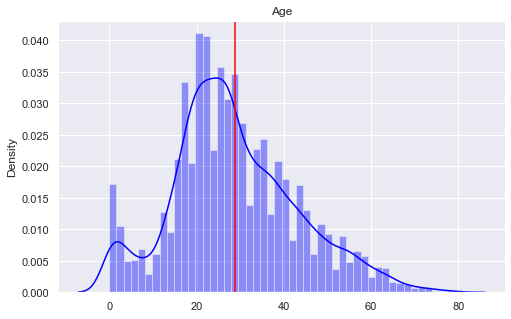

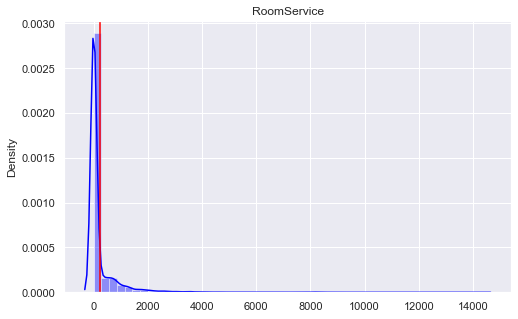

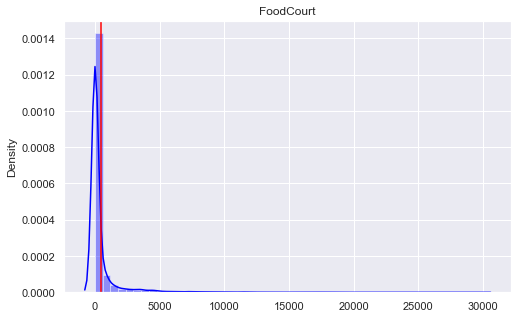

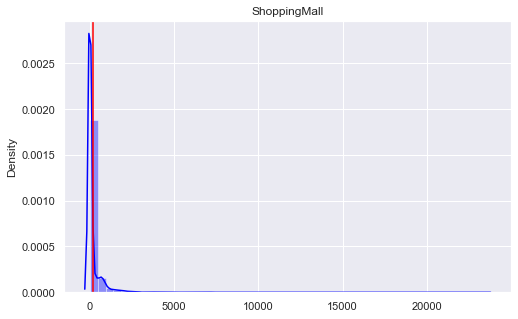

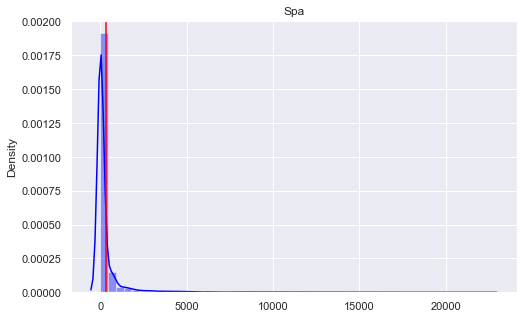

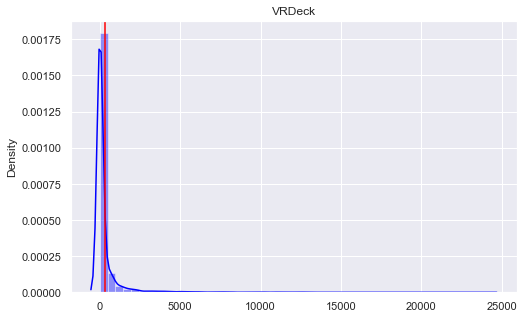

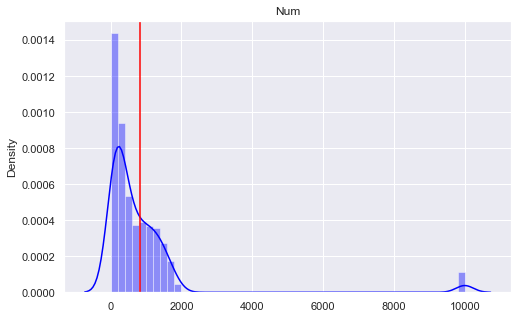

In [18]:
# Investingating the distribution
sns.set(rc={"figure.figsize":(8,5)})

for n in numeric2:
    x = raw_data_clean[n].values
    sns.distplot(x, color="blue")
    
    #caculating the mean
    mean = raw_data_clean[n].mean()
    
    #plotting the mean
    plt.axvline(mean,0,1, color= "red")
    plt.title(n)
    plt.show()

Age
The Median is : 27.0


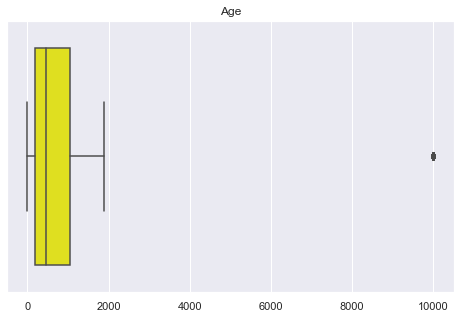

RoomService
The Median is : 0.0


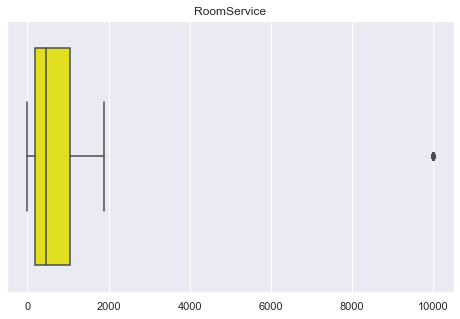

FoodCourt
The Median is : 0.0


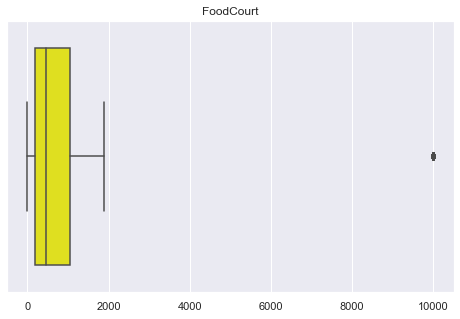

ShoppingMall
The Median is : 0.0


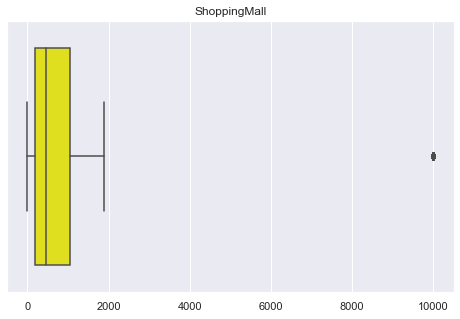

Spa
The Median is : 0.0


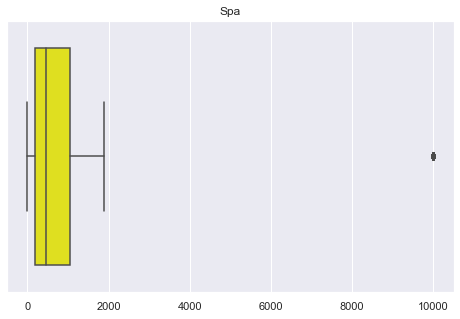

VRDeck
The Median is : 0.0


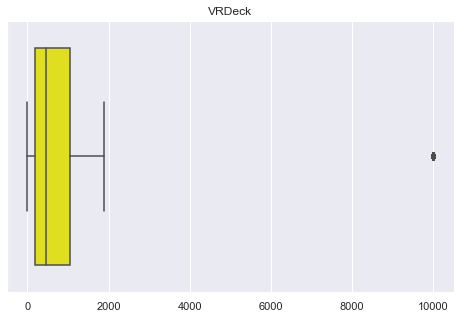

Num
The Median is : 448.0


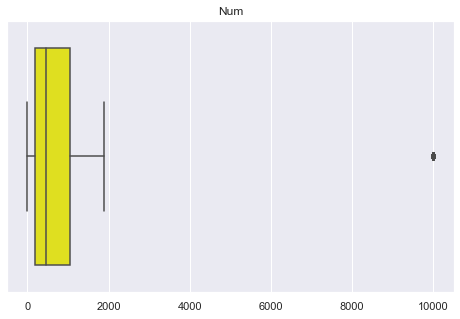

In [19]:
 # Increasing the sns plot
sns.set(rc={"figure.figsize":(8,5)})
    
for c in numeric2:
    print(c)
    x = raw_data_clean[n].values
    ax  = sns.boxplot(x, color = "yellow")
    print("The Median is :",raw_data_clean[c].median())
    plt.title(c)
    plt.show()
        

In [20]:
raw_data_clean[raw_data_clean["FoodCourt"] > 20000]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Cabin_Category
1213,1292_01,Europa,False,55 Cancri e,31.0,True,0.0,27723.0,3.0,202.0,3146.0,Scharab Conale,True,B,55,S,Cabin category A
1842,1969_01,Europa,False,55 Cancri e,27.0,False,0.0,21066.0,0.0,2448.0,2293.0,Unukath Sandul,True,C,75,S,Cabin category A
2067,2215_01,Europa,False,55 Cancri e,41.0,True,0.0,29813.0,0.0,1257.0,6.0,Pulchib Quidedbolt,True,A,27,S,Cabin category A
3198,3444_01,Europa,False,55 Cancri e,33.0,False,0.0,27071.0,0.0,15.0,0.0,Ainoxa Scerodbox,True,B,131,S,Cabin category A
3538,3796_01,Europa,False,55 Cancri e,33.0,False,90.0,26830.0,0.0,27.0,703.0,Dhena Semageary,True,B,121,P,Cabin category A


## Scaling the data & Turning categorical values in Numerical Representation

conclusion is we do not o remove the outlier we deal with using by scaling the data

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
raw_data_clean[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Num"]] = scaler.fit_transform(raw_data_clean[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Num"]])

In [22]:
## Making the categorical values to Numerical values
new_raw_data = pd.get_dummies(raw_data_clean, columns = ["HomePlanet","CryoSleep","VIP","Deck","Side","Destination","Cabin_Category"])
new_raw_data.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan,Side_P,Side_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,Cabin_Category_Cabin category A,Cabin_Category_Cabin category B,Cabin_Category_Cabin category C,Cabin_Category_Cabin category D,Cabin_Category_Cabin category E,Cabin_Category_Cabin category F,Cabin_Category_Cabin category G
0,0001_01,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,0.0000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,0002_01,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,Juanna Vines,True,0.0000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,0003_01,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,Altark Susent,False,0.0000,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,0003_02,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,Solam Susent,False,0.0000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0004_01,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,Willy Santantines,True,0.0001,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [23]:
new_raw_data.columns

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported', 'Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan',
       'CryoSleep_False', 'CryoSleep_True', 'CryoSleep_nan', 'VIP_False',
       'VIP_True', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T', 'Deck_nan', 'Side_P', 'Side_S',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_nan',
       'Cabin_Category_Cabin category A', 'Cabin_Category_Cabin category B',
       'Cabin_Category_Cabin category C', 'Cabin_Category_Cabin category D',
       'Cabin_Category_Cabin category E', 'Cabin_Category_Cabin category F',
       'Cabin_Category_Cabin category G'],
      dtype='object')

In [26]:
pc

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,CryoSleep_nan,VIP_False,Side_P,Side_S,Num,Cabin_Category_Cabin category A,Cabin_Category_Cabin category B,Cabin_Category_Cabin category C,Cabin_Category_Cabin category D,Cabin_Category_Cabin category E,Cabin_Category_Cabin category F,Cabin_Category_Cabin category G
RoomService,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.138316,-0.066635,0.245222,0.240750,-0.244089,-0.000874,-0.056566,0.006991,-0.006991,0.022175,0.015775,0.003458,-0.031567,-0.011774,-0.020544,0.032501,0.021345
FoodCourt,-0.015126,1.000000,-0.013717,0.221468,0.224572,-0.208772,0.365102,-0.124755,0.202675,-0.205928,0.000613,-0.125499,-0.019682,0.019682,-0.060788,0.217067,-0.063761,-0.076831,-0.078581,-0.069548,-0.047516,-0.007791
ShoppingMall,0.052337,-0.013717,1.000000,0.014542,-0.007849,-0.069099,-0.021155,0.111654,0.207213,-0.207798,-0.007749,-0.018412,0.020940,-0.020940,-0.008534,0.017067,-0.008332,-0.013999,-0.007965,-0.007895,0.024097,-0.007121
Spa,0.009244,0.221468,0.014542,1.000000,0.147658,-0.155374,0.266103,-0.087989,0.196893,-0.198307,-0.004740,-0.060991,-0.005700,0.005700,-0.018301,0.142753,-0.034448,-0.060189,-0.054852,-0.054790,-0.028768,0.014775
VRDeck,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.152875,0.282556,-0.111863,0.190437,-0.192721,-0.001783,-0.123061,0.009089,-0.009089,-0.052917,0.157622,-0.031156,-0.059614,-0.062604,-0.057149,-0.032111,-0.012509
HomePlanet_Earth,-0.138316,-0.208772,-0.069099,-0.155374,-0.152875,1.000000,-0.604411,-0.534195,0.107932,-0.109133,-0.001297,0.162341,0.020006,-0.020006,0.107538,-0.426516,0.086601,0.177623,0.175038,0.187994,0.025773,0.008343
HomePlanet_Europa,-0.066635,0.365102,-0.021155,0.266103,0.282556,-0.604411,1.000000,-0.287022,-0.094665,0.093395,0.008236,-0.147008,-0.040700,0.040700,-0.143116,0.544199,-0.124938,-0.197581,-0.204413,-0.198073,-0.134547,-0.010511
HomePlanet_Mars,0.245222,-0.124755,0.111654,-0.087989,-0.111863,-0.534195,-0.287022,1.000000,-0.031692,0.032715,-0.001669,-0.043523,0.021160,-0.021160,0.015085,-0.043757,0.020332,-0.010422,0.000427,-0.020866,0.110269,-0.006603
CryoSleep_False,0.240750,0.202675,0.207213,0.196893,0.190437,0.107932,-0.094665,-0.031692,1.000000,-0.947367,-0.206864,-0.080247,0.019696,-0.019696,-0.012690,-0.012098,0.021794,-0.032872,-0.015740,-0.005563,0.069954,-0.004483
CryoSleep_True,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,-0.109133,0.093395,0.032715,-0.947367,1.000000,-0.117247,0.078281,-0.023858,0.023858,0.009575,0.013796,-0.024658,0.035938,0.017297,0.001282,-0.066198,0.000312


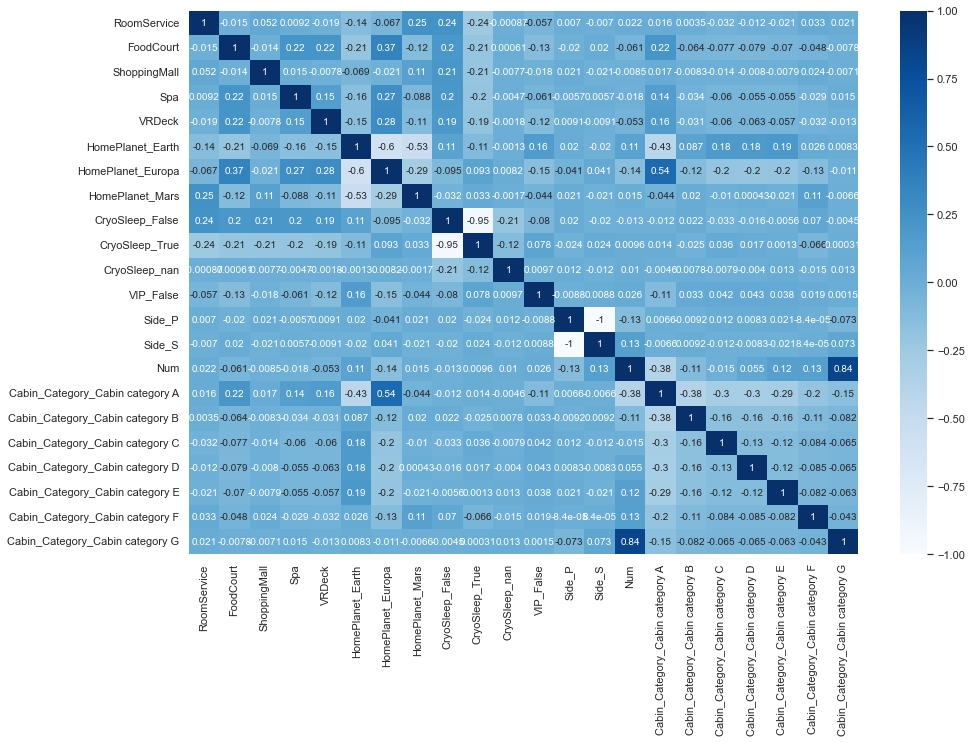

In [25]:
sns.set(rc={"figure.figsize":(15,10)})

n_variables = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck',  'HomePlanet_Earth','HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'CryoSleep_nan', 'VIP_False',
        'Side_P', 'Side_S', "Num",
       'Cabin_Category_Cabin category A', 'Cabin_Category_Cabin category B',
       'Cabin_Category_Cabin category C', 'Cabin_Category_Cabin category D',
       'Cabin_Category_Cabin category E', 'Cabin_Category_Cabin category F',
       'Cabin_Category_Cabin category G']

pc = new_raw_data[n_variables].corr(method="pearson")
cols = n_variables

ax =sns.heatmap(pc, annot=True, yticklabels=cols, xticklabels=cols, annot_kws={"size":10}, cmap = "Blues")

## Feature Importance

1) split the data into X and y 
2) Run a Tree_based estimator (i.e decision trees & random forest)
3) Run a Feature Importance
4) we measure the Importance of a feature by calculating rhe increase in the models prediction error after permutting the feature

In [27]:
from sklearn.tree import DecisionTreeClassifier

#deleting the rerun
try:
    del final_fi
except:
    print("")
    
#split the data into X & y
X = new_raw_data.drop(["Transported", "PassengerId", "Name"], axis =1).values
X_column = new_raw_data.drop(["Transported", "PassengerId", "Name"], axis =1)
y = new_raw_data["Transported"]

print(X.shape)
print(y.shape)

#runa tree_based estimators ( i.e decision trees and random foresrs)
dt = DecisionTreeClassifier(random_state = 15, criterion="entropy", max_depth = 10)
dt.fit(X, y)

#calculating Fi
for i, column in enumerate(new_raw_data.drop(["Transported","PassengerId", "Name"], axis =1)):
    print("importance of feature {}:, {:.3f}".format(column,dt.feature_importances_[i]))
    
    fi = pd.DataFrame({"variable": [column],"Feature Importance Score":[dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
# ordering the Data
final_fi = final_fi.sort_values("Feature Importance Score", ascending = False).reset_index()
final_fi


(8693, 38)
(8693,)
importance of feature Age:, 0.058
importance of feature RoomService:, 0.054
importance of feature FoodCourt:, 0.070
importance of feature ShoppingMall:, 0.019
importance of feature Spa:, 0.100
importance of feature VRDeck:, 0.102
importance of feature Num:, 0.068
importance of feature HomePlanet_Earth:, 0.075
importance of feature HomePlanet_Europa:, 0.007
importance of feature HomePlanet_Mars:, 0.010
importance of feature HomePlanet_nan:, 0.001
importance of feature CryoSleep_False:, 0.000
importance of feature CryoSleep_True:, 0.300
importance of feature CryoSleep_nan:, 0.000
importance of feature VIP_False:, 0.000
importance of feature VIP_True:, 0.000
importance of feature Deck_A:, 0.002
importance of feature Deck_B:, 0.001
importance of feature Deck_C:, 0.006
importance of feature Deck_D:, 0.000
importance of feature Deck_E:, 0.035
importance of feature Deck_F:, 0.004
importance of feature Deck_G:, 0.013
importance of feature Deck_T:, 0.000
importance of featur

,index,variable,Feature Importance Score
0,12,CryoSleep_True,0.299842
1,5,VRDeck,0.102448
2,4,Spa,0.099501
3,7,HomePlanet_Earth,0.074643
4,2,FoodCourt,0.069662
5,6,Num,0.068173
6,0,Age,0.058009
7,1,RoomService,0.054394
8,20,Deck_E,0.034898
9,25,Side_P,0.021863


## Training & Running the classification Model



In [28]:
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
#running the model
clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X,y)

y_pred = clf.predict(X)
print("score", clf.score(X,y))

pred_proba_t = clf.predict_proba(X)
log_loss=log_loss(y, pred_proba_t)
log_loss

print("Logistic Loss", log_loss)

score 0.8075463016219947
Logistic Loss 0.4071276090461236


In [32]:
clf.classes_

array(['False', 'True'], dtype=object)

In [35]:
np.set_printoptions(formatter={"float_kind":"{:f}".format})
pred_proba_t

array([[0.451141, 0.548859],
       [0.968693, 0.031307],
       [0.996909, 0.003091],
       [0.998593, 0.001407],
       [0.859540, 0.140460],
       [0.846699, 0.153301],
       [0.178891, 0.821109],
       [0.600069, 0.399931],
       [0.602179, 0.397821],
       [0.037020, 0.962980],
       [0.064702, 0.935298],
       [0.032796, 0.967204],
       [0.623556, 0.376444],
       [0.914793, 0.085207],
       [0.574394, 0.425606],
       [0.525767, 0.474233],
       [0.820831, 0.179169],
       [0.800653, 0.199347],
       [0.187261, 0.812739],
       [0.743640, 0.256360],
       [0.938095, 0.061905],
       [0.335911, 0.664089],
       [0.352597, 0.647403],
       [0.386694, 0.613306],
       [0.717408, 0.282592],
       [0.311438, 0.688562],
       [0.717408, 0.282592],
       [0.962764, 0.037236],
       [0.014563, 0.985437],
       [0.773354, 0.226646],
       [0.511078, 0.488922],
       [0.932676, 0.067324],
       [0.943590, 0.056410],
       [0.830864, 0.169136],
       [0.3645

In [30]:
y

0       False
1        True
2       False
3       False
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13      False
14       True
15      False
16      False
17      False
18       True
19       True
20      False
21      False
22      False
23      False
24       True
25      False
26      False
27      False
28       True
29      False
30      False
31      False
32      False
33       True
34       True
35       True
36       True
37      False
38      False
39      False
40      False
41       True
42      False
43      False
44       True
45       True
46      False
47       True
48      False
49      False
50      False
51       True
52       True
53       True
54       True
55      False
56      False
57      False
58       True
59       True
60      False
61       True
62       True
63      False
64      False
65       True
66      False
67      False
68      False
69      False
70       True
71    

In [31]:
y_pred

array(['True', 'False', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'True', 'True', 'True', 'False', 'False',
       'False', 'False', 'False', 'False', 'True', 'False', 'False',
       'True', 'True', 'True', 'False', 'True', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True',
       'True', 'True', 'False', 'True', 'False', 'False', 'False', 'True',
       'True', 'True', 'True', 'True', 'False', 'True', 'True', 'True',
       'False', 'True', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'True', 'True', 'True', 'True', 'False', 'True',
       'False', 'True', 'True', 'False', 'True', 'False', 'True', 'True',
       'True', 'False', 'False', 'True', 'True', 'True', 'False', 'True',
       'False', 'False', 'True', 'False', 'False', 'True', 'True',
       'False', 'False', 'True', 'False', 'True', 'False', 'False',
      

In [50]:
#loading the test data
test_data = pd.read_csv("Datasets Folder/test spaceship titanic.csv")

#remove warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#chanignthe types so we visualize
strings4 = ["PassengerId","HomePlanet", "CryoSleep","Cabin","Destination","VIP","Name"]
numeric4 = ["Age", "RoomService", "FoodCourt", "Spa", "VRDeck"]

for s in strings4:
    test_data[s] = test_data[s].astype(str)
    
for n in numeric4:
    test_data[n] = test_data[n].astype(float)
    
# adding 3 more columns
test_data[["Deck","Num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)

# delet the Cabin Column
del test_data["Cabin"]

#creating a new field for cabin number based n findings
test_data["Num"][test_data["Num"].isna()] = 99999
test_data["Num"] = test_data["Num"].astype(int)

raw_data_clean["Cabin_Category"] = "unknown"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] <= 300] = "Cabin category A"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 300] = "Cabin category B"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 600] = "Cabin category C"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] >900 ] = "Cabin category D"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 1200] = "Cabin category E"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 1500] = "Cabin category F"
raw_data_clean["Cabin_Category"][raw_data_clean["Num"] > 1800] = "Cabin category G"

# putting the np.nan back
test_data["Num"][test_data["Num"] == 99999] = np.nan

#changing missing values to mode and median
strings5 = ["PassengerId","HomePlanet", "CryoSleep","Cabin_Category","VIP","Name","Destination"]
numeric5 = ["Age", "RoomService", "FoodCourt", "Spa", "VRDeck","Num"]

for s in strings5:
    mode = test_data[s].mode()[0]
    test_data[s] = test_data[s].fillna(mode)
    test_data[s][test_data[s] == "nan"] = mode
    
for n in numeric5:
    test_data[n] = test_data[n].astype(float)
    median = test_data[n].median()
    test_data[n] = test_data.fillna(median)
    
# scaling the data
test_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = scaler.fit_transform(test_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

# making the categorial variables into numerical representation
test_data = pd.get_dummies(test_data, columns= ["HomePlanet", "CryoSleep","Destination","VIP","Deck","Cabin_category", "Side","Num"])

#split the Data X & y
X_test = test_data.drop(["PassengerId", "Name"], axis=1).values

# making predictions
y_pred = clf.predict(X_pred)


KeyError: 'Cabin_Category'